

# Model Evaluation and Refinement
---

## **What I Learned**

- I learned how to **evaluate and refine prediction models** to ensure they are accurate and reliable.  
- I understood the concepts of **over-fitting**, **under-fitting**, and **model selection**, and how they impact predictive performance.  
- I learned how to apply **Ridge Regression** to prevent over-fitting in linear models.  
- I learned to use **Grid Search** and **cross-validation** for hyperparameter tuning and selecting the best model.  
- I explored **Python libraries** like `tqdm` for progress bars and `ipywidgets` to create interactive elements during model evaluation.  
- I gained insight into **how metrics and validation techniques** help in comparing models and refining them for better predictions.

---

## 💡 **Why This Lab Matters**

This lab reinforced the importance of **model evaluation** in predictive analytics.  
By evaluating and refining models, I can:

- Ensure predictions are **accurate and generalizable** to new data.  
- Avoid **overly complex models** that fail to perform well outside the training data.  
- Make **data-driven decisions** with confidence in the model’s reliability.  
- Apply **interactive tools** like `tqdm` and `ipywidgets` to monitor training and explore model behavior efficiently.

---

## 🗂 **Table of Contents**

1. Model Evaluation  
2. Over-fitting, Under-fitting, and Model Selection  
3. Ridge Regression  
4. Grid Search and Cross-Validation  



<h2>Table of Contents</h2>
<ul>
    <li><a href="https://#ref1">Model Evaluation </a></li>
    <li><a href="https://#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="https://#ref3">Ridge Regression </a></li>
    <li><a href="https://#ref4">Grid Search</a></li>
</ul>


If you are running the lab in your browser in Skills Network lab, so need to install the libraries using piplite.


In [64]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])
# await piplite.install(['scipy'])
# await piplite.install(['scikit-learn'])
# await piplite.install(['seaborn'])

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [65]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
#! mamba install sklearn=0.20.1-y

Import libraries:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(filepath, header=0)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


First, let's only use numeric data:


In [5]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Let's remove the columns 'Unnamed:0.1' and 'Unnamed:0' since they do not provide any value to the models.


In [6]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

# Let's take a look at the updated DataFrame
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Libraries for plotting:


In [7]:
%pip install micropip
import micropip
await micropip.install(['ipywidgets'], keep_going=True)
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

Note: you may need to restart the kernel to use updated packages.


<h2>Functions for Plotting</h2>


In [8]:
# Function: DistributionPlot
# Purpose:  Draw two overlaid kernel-density (smoothed distribution) curves for comparison.
#
# Parameters:
#   - RedFunction: 1D array-like (e.g., actual values) to plot as the red KDE.
#   - BlueFunction: 1D array-like (e.g., predicted values) to plot as the blue KDE.
#   - RedName: string used as the legend label for the red curve.
#   - BlueName: string used as the legend label for the blue curve.
#   - Title: string for the plot title.
#
# Line-by-line behavior:
#   width = 12
#     # Set figure width (in inches).
#
#   height = 10
#     # Set figure height (in inches).
#
#   plt.figure(figsize=(width, height))
#     # Create a new figure with the specified size.
#
#   ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
#     # Draw the KDE of RedFunction in red and save the Axes to ax1.
#
#   ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)
#     # Draw the KDE of BlueFunction in blue on the same Axes (overlay).
#
#   plt.title(Title)
#     # Add the title string to the plot.
#
#   plt.xlabel('Price (in dollars)')
#     # Label the x-axis (change the text if not plotting Price).
#
#   plt.ylabel('Proportion of Cars')
#     # Label the y-axis. For a KDE this is probability density (not raw counts).
#
#   plt.show()
#     # Render the plot in the notebook (or GUI).
#
#   plt.close()
#     # Close the figure to free memory and avoid duplicate displays.


In [37]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
# Function: PollyPlot
# Purpose:  Plot polynomial regression results, overlaying training data, test data, and the predicted function.
#
# Parameters:
#   - xtrain: 1D array-like, predictor values for the training set.
#   - xtest: 1D array-like, predictor values for the test set.
#   - y_train: 1D array-like, target values for the training set.
#   - y_test: 1D array-like, target values for the test set.
#   - lr: a fitted LinearRegression object (or any regression model with a .predict method).
#   - poly_transform: a PolynomialFeatures object used to transform x values into polynomial features.
#
# Line-by-line behavior:
#   width = 12
#     # Set figure width in inches.
#
#   height = 10
#     # Set figure height in inches.
#
#   plt.figure(figsize=(width, height))
#     # Create a new figure with the specified size.
#
#   xmax = max([xtrain.values.max(), xtest.values.max()])
#     # Find the maximum x value from both training and test sets to define plot range.
#
#   xmin = min([xtrain.values.min(), xtest.values.min()])
#     # Find the minimum x value from both training and test sets to define plot range.
#
#   x = np.arange(xmin, xmax, 0.1)
#     # Generate a sequence of x values with step 0.1 to plot a smooth predicted curve.
#
#   plt.plot(xtrain, y_train, 'ro', label='Training Data')
#     # Plot training points as red circles and label them "Training Data".
#
#   plt.plot(xtest, y_test, 'go', label='Test Data')
#     # Plot test points as green circles and label them "Test Data".
#
#   plt.plot(
#       x,
#       lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))),
#       label='Predicted Function'
#   )
#     # Plot the polynomial regression prediction curve:
#     #   1. Reshape x to (-1,1) for sklearn compatibility.
#     #   2. Transform x using the polynomial transformer.
#     #   3. Predict y values using the fitted regression model.
#     #   4. Overlay the predicted curve on the plot with a label.
#
#   plt.ylim([-10000, 60000])
#     # Set y-axis limits to focus the plot on a reasonable range for Price.
#
#   plt.ylabel('Price')
#     # Label the y-axis as 'Price'.
#
#   plt.legend()
#     # Add a legend to distinguish training data, test data, and predicted curve.


In [51]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    plt.close()

<h2 id="ref1">Part 1: Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [9]:
y_data = df['price']

Drop price data in dataframe **x_data**:


In [10]:
x_data=df.drop('price',axis=1)

Now, we randomly split our data into training and testing data using the function <b>train_test_split</b>.


In [11]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".</b>

</div>


In [12]:
# Write your code below and press Shift+Enter to execute 
x1_train, x1_test, y1_train, y1_test = train_test_split(x_data, y_data, test_size=0.4 , random_state=0)


print("number of test samples :", x1_test.shape[0])
print("number of training samples:",x1_train.shape[0])

number of test samples : 81
number of training samples: 120


Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.


In [13]:
from sklearn.linear_model import LinearRegression

We create a Linear Regression object:


In [14]:
lre=LinearRegression()

We fit the model using the feature "horsepower":


In [15]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:


In [16]:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

We can see the R^2 is much smaller using the test data compared to the training data.


In [17]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b> 
Find the R^2  on the test data using 40% of the dataset for testing.
</b>
</div>


In [18]:
# Write your code below and press Shift+Enter to execute 
lre1 = LinearRegression()
lre1.fit(x1_train[['horsepower']],y1_train)
print(lre1.score(x1_train[["horsepower"]], y1_train))
print("")
lre1.score(x1_test[["horsepower"]], y1_test)

0.5754067463583004



0.7139364665406973

Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.


<h2>Cross-Validation Score</h2>


Let's import <b>cross_val_score</b> from the module <b>model_selection</b>.


In [19]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.


In [20]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:


In [21]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

We can calculate the average and standard deviation of our estimate:


In [22]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220099150421194 and the standard deviation is 0.2911839444756025


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'.


___
## Background: Cross-Validation and Scoring

When we perform cross-validation, we are essentially evaluating how well our model performs on unseen data. Scikit-learn’s cross_val_score function computes a “score” for each fold of the data.

By default:

Higher scores are considered better in cross_val_score.

For metrics where higher is better `(like R²)`, this is intuitive.

But for error metrics, like `Mean Squared Error (MSE)`, lower is better because smaller error means the model predicts more accurately.

### Why Negative MSE?

- cross_val_score expects a score to be “higher is better”.

- MSE naturally is “lower is better.”

- To make it compatible with cross_val_score, scikit-learn negates MSE and returns it as negative mean squared error.

So: `neg_MSE = − MSE`


A less negative value (closer to 0) means smaller MSE, which is actually better.

A more negative value means larger error, which is worse.

That’s why in practice, you often see:

```python
-1 * cross_val_score(model, X, y, cv=4, scoring='neg_mean_squared_error')
```

Multiplying by -1 flips the negative MSE back to positive, so you can interpret it as the usual MSE.

In [24]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247589])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature: 
</b>
</div>


In [25]:
# Write your code below and press Shift+Enter to execute 
Rcross1 = cross_val_score(lre, x_data[["horsepower"]] , y_data , cv=2)
print(f"{Rcross1} \n")
print("The mean of the folds are", Rcross1.mean(), "and the standard deviation is" , Rcross1.std())

[0.59015621 0.44319613] 

The mean of the folds are 0.5166761697127429 and the standard deviation is 0.07348004195771385


You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:


In [26]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:


In [27]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h2 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [28]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data:


In [29]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Prediction using test data:


In [30]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.


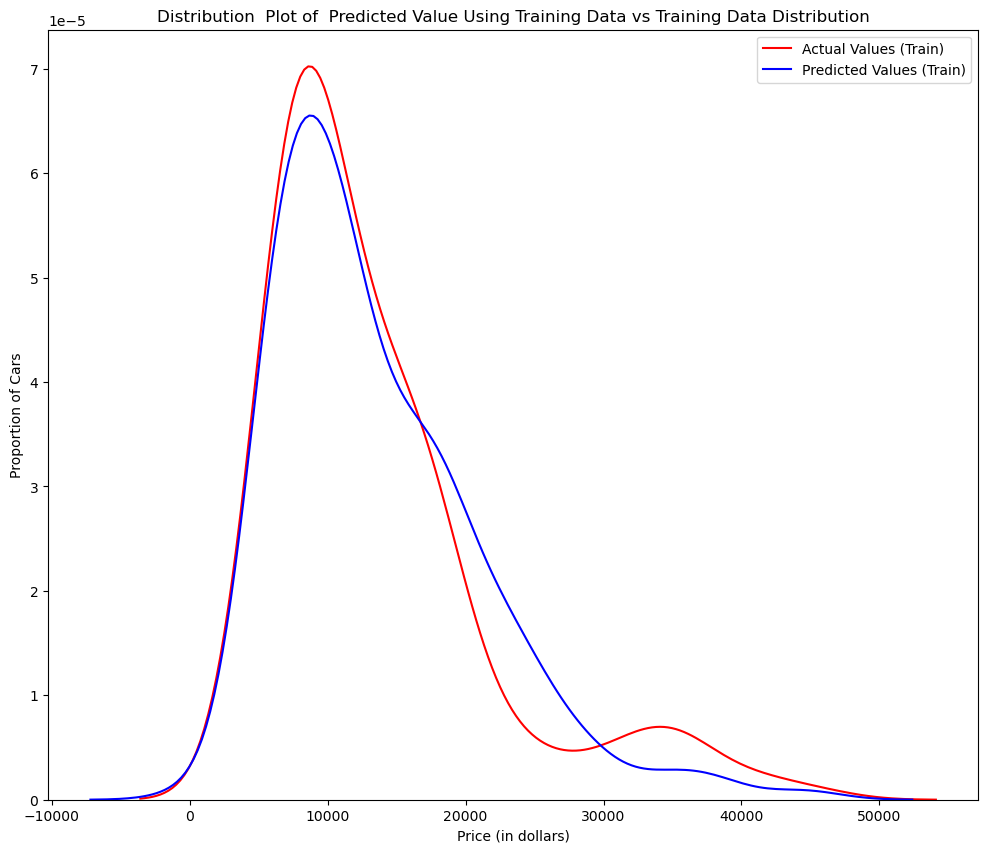

In [38]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.


So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


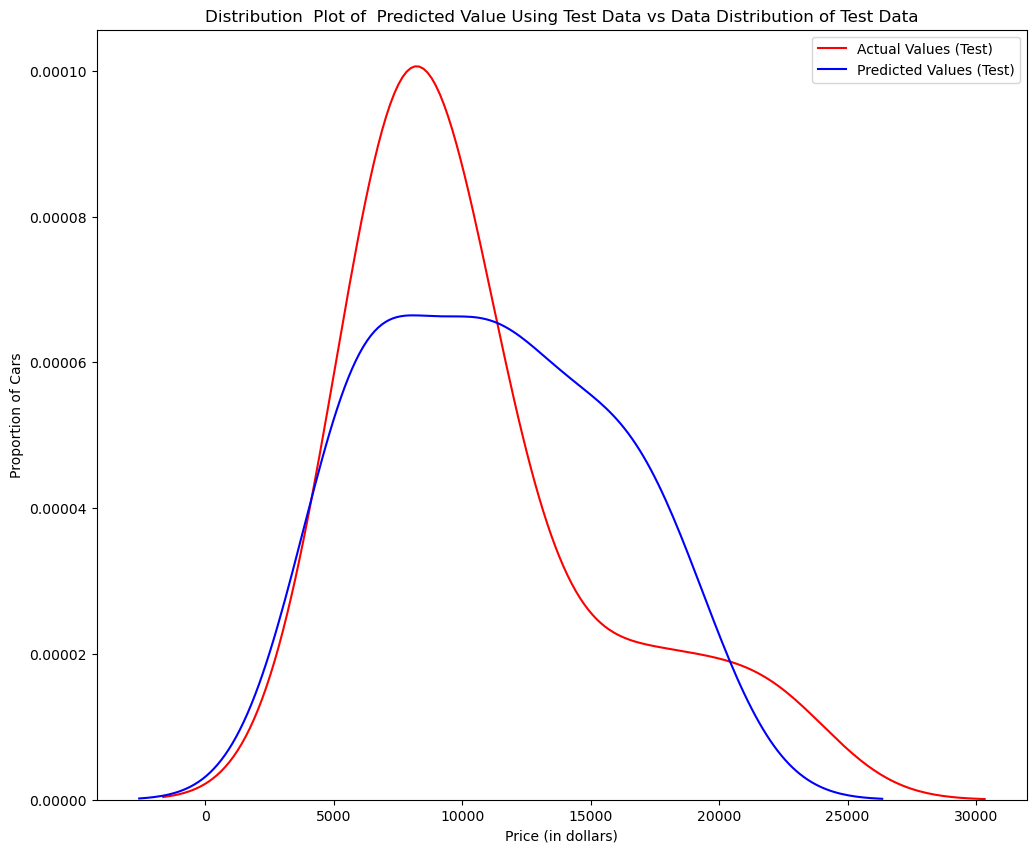

In [39]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.


<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [40]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


Let's use 55 percent of the data for training and the rest for testing:


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>.


In [44]:
# Import the necessary module
from sklearn.preprocessing import PolynomialFeatures

# Create a PolynomialFeatures object
# - degree=5: Generate polynomial features up to x^5
#   For a feature X, it will create [1, X, X^2, X^3, X^4, X^5]
#   '1' is the bias term (intercept) included by default
pr = PolynomialFeatures(degree=5)

# Transform the training data
# - fit_transform() does two things:
#   1. fit(): learns the polynomial transformation from x_train
#   2. transform(): applies the transformation to x_train
# - The output x_train_pr is a new array with 6 columns:
#   [1, X, X^2, X^3, X^4, X^5] for each training sample
# - This prepares the training features for polynomial regression
x_train_pr = pr.fit_transform(x_train[['horsepower']])

# Transform the test data
# - transform() applies the same polynomial transformation learned from training
# - We do NOT use fit_transform() on test data to avoid leaking information
# - The output x_test_pr now has the same polynomial feature columns as x_train_pr
x_test_pr = pr.transform(x_test[['horsepower']])

# Display the PolynomialFeatures object to inspect its settings
# - You will see degree, include_bias, and interaction_only parameters
pr



PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model "poly" and train it.


In [45]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [46]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.73877623,  7308.06173582, 12213.81078747, 18893.1290908 ,
       19995.81407813])

Let's take the first five predicted values and compare it to the actual targets.


In [47]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.73877623  7308.06173582 12213.81078747 18893.1290908 ]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


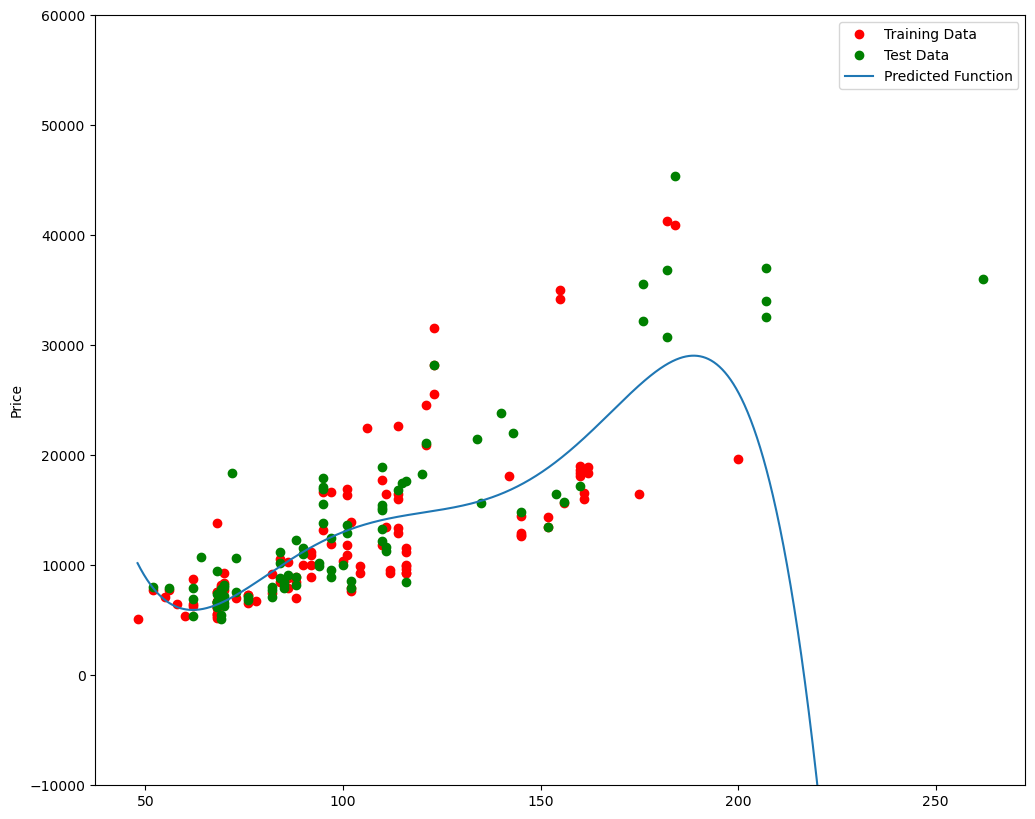

In [53]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


R^2 of the training data:


In [54]:
poly.score(x_train_pr, y_train)

0.5567716902028981

R^2 of the test data:


In [55]:
poly.score(x_test_pr, y_test)

-29.871621329672777

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


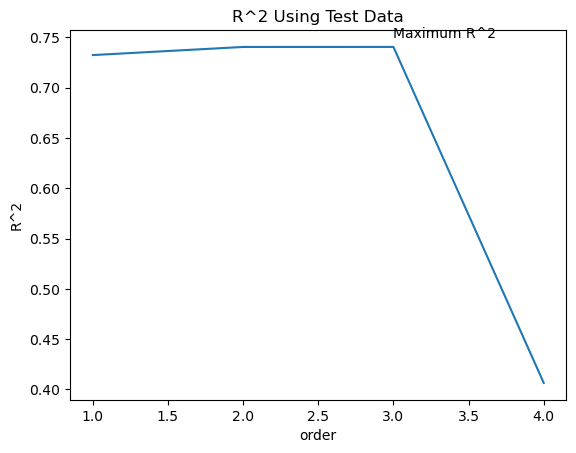

In [59]:
# Initialize an empty list to store R-squared values for the test set
Rsqu_test = []

# Define the list of polynomial degrees (orders) to test
order = [1, 2, 3, 4]

# Loop through each polynomial order
for n in order:
    # Create a PolynomialFeatures object of degree n
    pr = PolynomialFeatures(degree=n)
    
    # Transform the training data to include polynomial features up to degree n
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    # Transform the test data using the same polynomial transformation
    x_test_pr = pr.transform(x_test[['horsepower']])    
    
    # Fit the linear regression model on the polynomial-transformed training data
    lr.fit(x_train_pr, y_train)
    
    # Evaluate the model on the transformed test data and append the R^2 score
    # lr.score() returns the coefficient of determination R^2
    Rsqu_test.append(lr.score(x_test_pr, y_test))

# Plot the R^2 scores vs. polynomial order
plt.plot(order, Rsqu_test)
plt.xlabel('order')           # Label x-axis as "order" (polynomial degree)
plt.ylabel('R^2')             # Label y-axis as "R^2"
plt.title('R^2 Using Test Data')  # Add a title to the plot
plt.text(3, 0.75, 'Maximum R^2 ')  # Add text annotation at a specific point
plt.show()                    # Display the plot
plt.close()                   # Close the figure to free memory


We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


The following function will be used in the next section. Please run the cell below.


In [65]:
# Function: f
# Purpose: Split the data, transform it using polynomial features of a given order,
#          train a linear regression model, and visualize the fitted curve.
#
# Parameters:
#   - order: degree of the polynomial features (integer)
#   - test_data: proportion of the dataset to use as test data (float between 0 and 1)


def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.transform(x_test[['horsepower']])
    poly = LinearRegression()
    
    # Fit the linear regression model on the polynomial training data
    poly.fit(x_train_pr,y_train)

    
    # Visualize the training, test, and predicted polynomial curve
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.


In [66]:
# Create an interactive widget to vary 'order' (0 to 6) and 'test_data' (5% to 95%)
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.</b>

</div>


In [67]:
# Write your code below and press Shift+Enter to execute 
pr1 = PolynomialFeatures(degree=2)
pr1

PolynomialFeatures()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>
</div>


In [69]:
# Write your code below and press Shift+Enter to execute 
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape".
</b>
</div>


In [70]:
# Write your code below and press Shift+Enter to execute 
x_train_pr1.shape

(110, 15)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</b>
</div>


In [71]:
# Write your code below and press Shift+Enter to execute 
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

<details><summary>Click here for the solution</summary>

```python
poly1=LinearRegression().fit(x_train_pr1,y_train)


```

</details>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.</b>
</div>


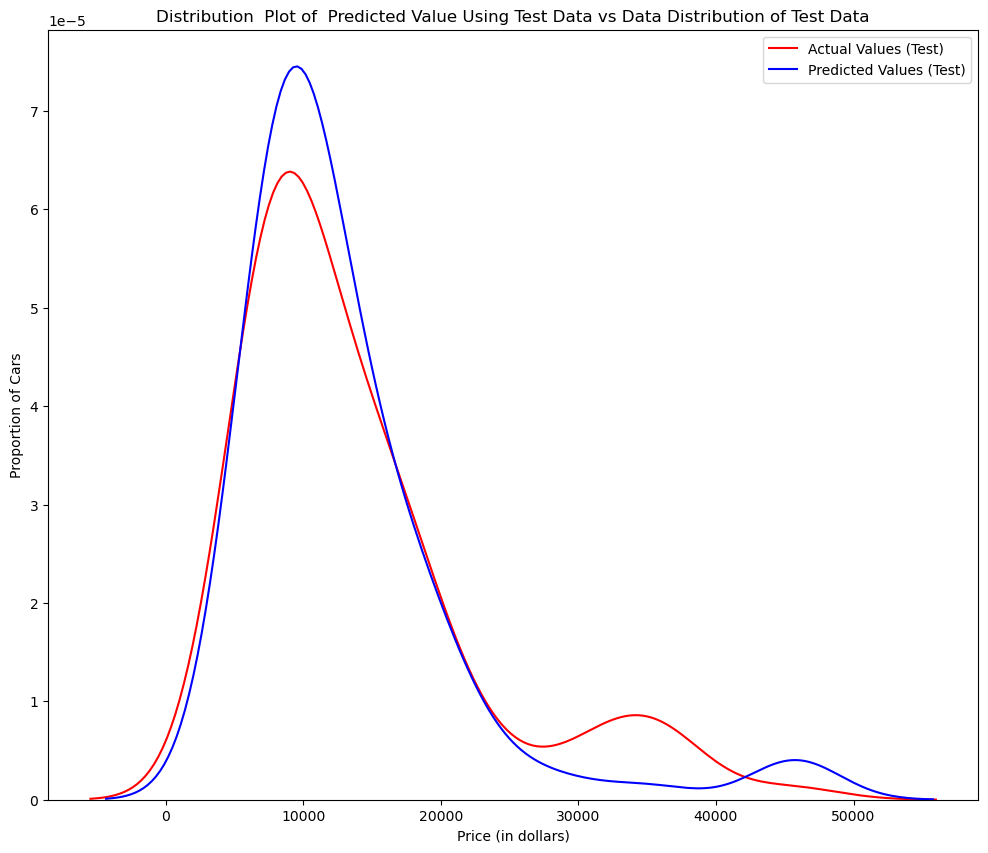

In [72]:
# Write your code below and press Shift+Enter to execute 
yhat_test1= poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.</b>

</div>


The predicted value is higher than actual value for cars where the price `$10,000` range, conversely the predicted price is lower than the price cost in the `$30,000` to `$40,000` range. As such the model is not as accurate in these ranges.

<h2 id="ref3">Part 3: Ridge Regression</h2> 


In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.


Let's perform a degree two polynomial transformation on our data.


In [73]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [74]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1


In [75]:
RigeModel=Ridge(alpha=1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [76]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

Similarly, you can obtain a prediction:


In [77]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set:


In [78]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [93]:
# Import the progress bar library
from tqdm import tqdm

# Initialize lists to store R^2 scores for test and training sets
Rsqu_test = []   # will store R^2 for test set
Rsqu_train = []  # will store R^2 for training set

# Dummy list (currently unused, might be for future use)
dummy1 = []

# Create an array of alpha values to test; 10 * [0,1,2,...,999] => [0,10,20,...,9990]
Alpha = 10 * np.array(range(0,1000))

# Initialize a progress bar for Alpha
pbar = tqdm(Alpha)

# Loop through each alpha value
for alpha in pbar:
    # Create a Ridge regression model with the current alpha (regularization strength)
    RigeModel = Ridge(alpha=alpha)
    
    # Fit the Ridge model on the polynomial-transformed training data
    RigeModel.fit(x_train_pr, y_train)
    
    # Calculate the R^2 score on test data and training data
    test_score = RigeModel.score(x_test_pr, y_test)     # out-of-sample performance
    train_score = RigeModel.score(x_train_pr, y_train)  # in-sample performance
    
    # Update the progress bar display with the current scores
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    
    # Store the scores in the corresponding lists for later plotting/analysis
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)


100%|█████████████████████████████████████████| 1000/1000 [00:10<00:00, 90.96it/s, Test Score=0.564, Train Score=0.859]


We can plot out the value of R^2 for different alphas:


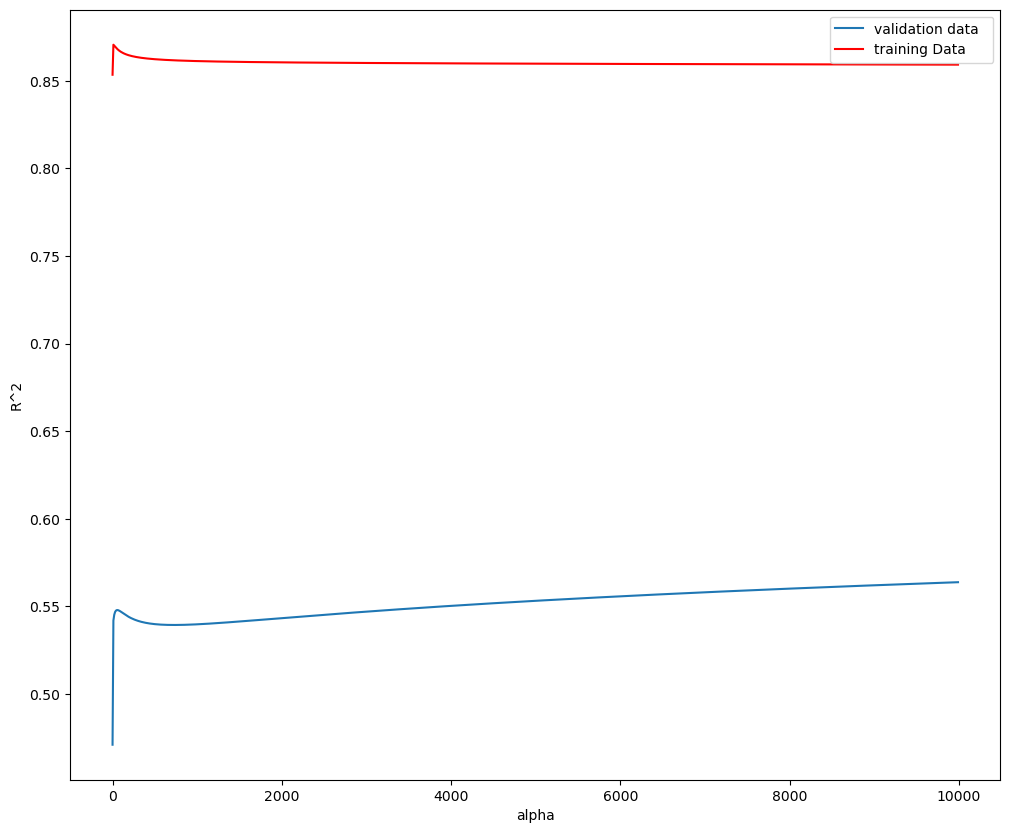

In [82]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()
plt.close()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

</div>


In [83]:
# Write your code below and press Shift+Enter to execute 
RM = Ridge(alpha=10)
RM.fit(x_train_pr, y_train)
yhat1 = RM.predict(x_test_pr)
print('predicted:', yhat1[0:4])
print('test set :', y_test[0:4].values)
print("")
RM.score(x_test_pr,y_test)

predicted: [ 6472.05406775  9537.15585237 21078.08955884 19750.77444841]
test set : [ 6295. 10698. 13860. 13499.]



0.5418576440207269

<h2 id="ref4">Part 4: Grid Search</h2>


The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [85]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [86]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object:


In [87]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object:


In [88]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)


Fit the model:


In [89]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [90]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

We now test our model on the test data:


In [91]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #6): </h1>
Perform a grid search to find the best alpha value and check if using feature scaling improves the model.
</div>


In [92]:
# Write your code below and press Shift+Enter to execute 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# Define parameter grid without 'normalize'
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

# Perform Grid Search
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_scaled, y_data)

# Best model
best_ridge_model = Grid2.best_estimator_
best_alpha = Grid2.best_params_['alpha']
best_alpha

100